## Experimenting with neural networks with multiple hidden layers

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import OrderedDict

In [45]:
def make_net(w, d):
#     Input layer
    od = OrderedDict([('lin1', nn.Linear(1, w)), ('relu1', nn.ReLU())])
#     Middle layers
    for l in range(d-1):
        od[f"lin{l+2}"] = nn.Linear(w, w)
        od[f"relu{l+2}"] = nn.ReLU()
#     Output
    od['out'] = nn.Linear(w, 1)
    
    return od

In [46]:
# Create neural network model class
class NeuralNetwork(nn.Module):
    def __init__(self, net):
        super(NeuralNetwork, self).__init__()
        self.seq_modules = nn.Sequential(net)

    def forward(self, x):
        logits = self.seq_modules(x)
        return logits

In [47]:
X = torch.linspace(-1, 1, 101).reshape((101, 1))

In [76]:
def plot_samps(w, d, n_s):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    ax = [ax1, ax2, ax3]
    for i in range(n_s):
        for j in range(3):
            net = make_net(2**(j+1), d)
            model = NeuralNetwork(net)
            y = model(X)
            ax[j].plot(X.detach(), y.detach())
            ax[j].set_title(f"w = {2**(j+2)}, d = {d}")
    plt.show()

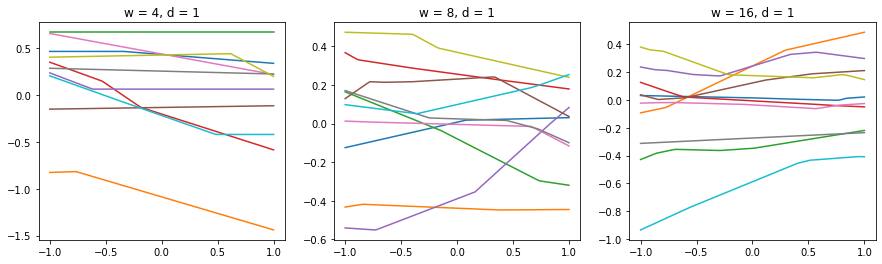

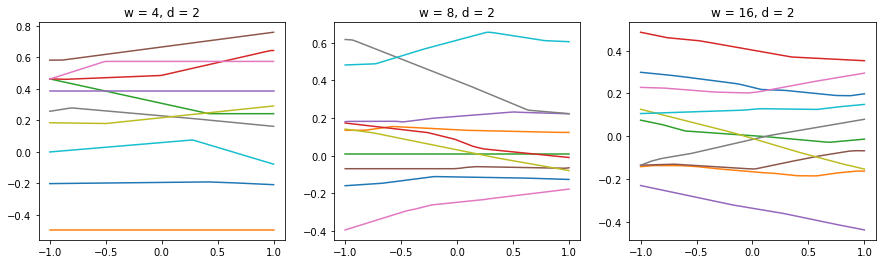

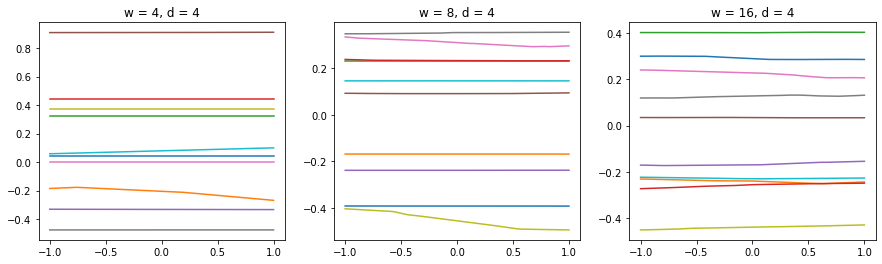

In [77]:
plot_samps(w=50, d=1, n_s=10)
plot_samps(w=50, d=2, n_s=10)
plot_samps(w=50, d=4, n_s=10)

The default parameter initialization for nn.Linear uses a Uniform(-sqrt(k), sqrt(k)) distribution, where k = 1/in_features, which ensures the variance = 1/12 * (2 * sqrt(k))^2 = 1/12 * (2 / sqrt(in_features))^2 = 1/3 * 1/in_features for each neuron, and the variance for an output from the layer with a constant input = (in_features + 1) * 1/3 * 1/in_features = 1/3 * (1 + 1/in_features) ...  Anyway it seems like it normalises it somehow, so that the variance of each function point is constant over width and depth, but the covariance of nearby points increases with depth (the length-scale of the covariance function increases).